Etape 1 : Initialiser les core points en fonctions du nombre de voisin voulu dans une distance donnée
Etape 2 : Prendre un Core point aléatoire,et attribuer à ces voisins core points au cluster (transmet)
Etape 3 : Les non-core point

Etape 4 : Reprendre un core point aléatoire pour recommencer si il y a encore des points sans label


# Clustering par densité avec DBSCAN

## Objectifs :
- Comprendre l'algorithme DBSCAN
- L'appliquer sur des données synthétiques et réelles
- Comparer avec d'autres méthodes de clustering

## Définition :
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est une méthode de regroupement qui identifie les clusters denses et marque les points isolés comme "bruit".
"""


Ecrire une fonction qui retourne les voisins pour un voisinage donné de distance eps.
On précisera la distance choisie:
- Euclidienne
- Manhattan
- Maximale


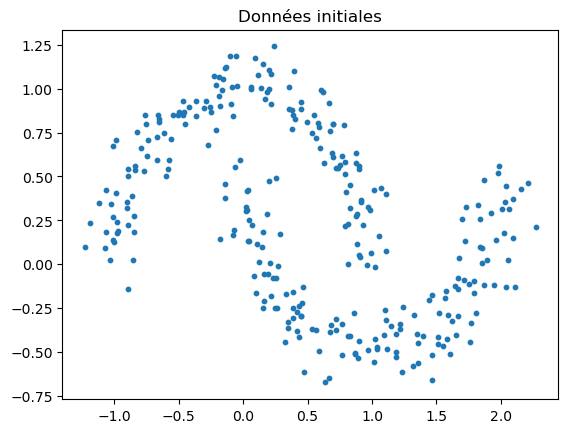

In [7]:
# Cellule 1 : Importation des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from sklearn.datasets import make_moons
from sklearn.metrics.pairwise import euclidean_distances

# Génération des données : un dataset en forme de lunes
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Affichage des données
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Données initiales")
plt.show()


In [8]:
# Fonction de calcul des voisins

def find_neighbors(X, point_idx, eps):
    """Retourne les indices des voisins d'un point donné selon eps"""
    distances = euclidean_distances(X, [X[point_idx]]).flatten()
    return np.where(distances < eps)[0]


L'algorithme DBSCAN utilise 2 paramètres : la distance eps
 et le nombre minimum de points 
MinPts devant se trouver dans un rayon 
eps pour que ces points soient considérés comme un cluster.

Les paramètres d'entrées sont donc une estimation de la densité de points des clusters.

L'idée de base de l'algorithme est, pour un point donné, de récupérer son 
voisinage et de vérifier qu'il contient bien 
MinPts points ou plus.

Ce point est alors considéré comme faisant partie d'un cluster. On parcourt ensuite l'eps-voisinage de proche en proche afin de trouver l'ensemble des points du cluster.

In [9]:
# Initialisation de DBSCAN
eps = 0.2  # Distance pour considérer un voisin
min_samples = 5  # Minimum de points pour former un cluster

n = len(X)
labels = np.full(n, -1)  # -1 signifie bruit
cluster_id = 0


- Créer une classe point

- Visiter tous les points

- Si le point n'a pas de label (i.e. son label vaut -1), on calcule son voisinage:


- - Si son voisinage ne contient pas assez de monde (<min_samples), son label passe/reste à -1

 - Si son voisinage contient assez de monde, on incrèmente le label et on lui attribue cette valeur
 - On transforme le voisinage en deque .En informatique, une file d'attente à double extrémité ou deque (abréviation de l'anglais double-ended queue) est un type abstrait permettant d'ajouter et de supprimer des données à la fin (queue) ou au début (tête), réunissant ainsi les avantages des files et des piles.
 - On récupère le premier élément, si son label était -1, il passe à la valeur données précédemment, il rejoint le cluster juste créé.


In [10]:

class Point:
    def __init__(self, coords):
        self.coords = coords  # Coordonnées du point
        self.visited = False  # Pour savoir si le point a été visité
        self.label = None  # Cluster ID ou 'Noise'

### Ecrire une fonction qui ajoute les points denses au cluster ( distance<eps):

-Ajouter le point initial au cluster.

-Ajouter tous ses voisins à la file d'attente.

-Tant que la file d'attente n'est pas vide :

    Retirer un voisin de la file.
    S'il n'a pas encore été visité :
        Le marquer comme visité.
        Trouver ses voisins.
        S'il a assez de voisins, les ajouter à la file d'attente.
    S'il n'appartient à aucun cluster, l'ajouter au cluster actuel

In [11]:
def expand_cluster(dataset, point, neighbors, C, eps, minPts):
    
    cluster = [point]
    queue = deque(neighbors)#les voisins sont dans la file d'attente

    while queue: # tant qu'il y a des gens en attente
        neighbor = queue.popleft()# je prend le premier à gauche
        
        if not neighbor.visited:# s'il n'a pas été visité
            neighbor.visited = True #je le visite
            new_neighbors = find_neighbors(dataset, neighbor, eps)# ses voisins 
            
            if len(new_neighbors) >= minPts:
                queue.extend(new_neighbors)  # Ajouter ses voisins à la file
        
        if neighbor.label is None:  # Si le premier n'a pas encore de cluster
            neighbor.label = C
            cluster.append(neighbor)

In [12]:
def DBSCANmain(dataset, eps, minPts):
    C = 0  # Compteur de clusters

    for point in dataset:
        if not point.visited:   
            point.visited = True
            neighbors = find_neighbors(dataset, point, eps)
        
            if len(neighbors) < minPts:
                point.label = 'Noise'
            else:
                C += 1
                point.label = C
                expand_cluster(dataset, point, neighbors, C, eps, minPts)

# Appliquer DBSCAN à la main
eps = 0.1
minPts = 15
#DBSCANmain(dataset, eps, minPts)




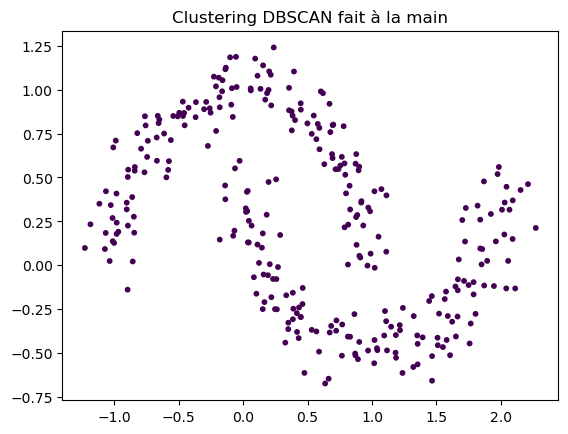

In [13]:
# Affichage des résultats
plt.scatter(X[:, 0], X[:, 1], c=labels,cmap="viridis", s=10)
plt.title("Clustering DBSCAN fait à la main")
plt.show()


In [14]:
import numpy as np

class Point:
    def __init__(self, coords):
        self.coords = coords
        self.visited = False
        self.label = None  # None = non assigné, -1 = bruit, sinon numéro de cluster

def find_neighbors(dataset, point, eps):
    """Trouve les points voisins dans un rayon eps autour de 'point'"""
    neighbors = []
    for other_point in dataset:
        if np.linalg.norm(point.coords - other_point.coords) <= eps:
            neighbors.append(other_point)
    return neighbors

def expand_cluster(point, neighbors, cluster_id, dataset, eps, minPts):
    """Ajoute les voisins au cluster en propageant la densité"""
    cluster = [point]
    queue = neighbors[:]  # Copie des voisins

    while len(queue) > 0:
        neighbor = queue.pop(0)

        if neighbor.visited is False:
            neighbor.visited = True
            new_neighbors = find_neighbors(dataset, neighbor, eps)
            if len(new_neighbors) >= minPts:
                queue.extend(new_neighbors)  # Ajouter les nouveaux voisins

        if neighbor.label is None:  # Si le voisin n'a pas de cluster
            neighbor.label = cluster_id
            cluster.append(neighbor)

    return cluster

def dbscan(dataset, eps, minPts):
    """Applique l'algorithme DBSCAN pour regrouper les points"""
    clusters = []
    cluster_id = 0

    for point in dataset:
        if point.visited is False:
            point.visited = True
            neighbors = find_neighbors(dataset, point, eps)

            if len(neighbors) >= minPts:
                cluster_id += 1
                point.label = cluster_id
                cluster = expand_cluster(point, neighbors, cluster_id, dataset, eps, minPts)
                clusters.append(cluster)
            else:
                point.label = -1  # Marqué comme bruit

    return clusters

# Exemple d'utilisation avec des points aléatoires
np.random.seed(42)
points = [Point(np.random.rand(2) * 10) for _ in range(20)]
eps = 2  # Rayon de voisinage
minPts = 3  # Minimum de points pour former un cluster

clusters = dbscan(points, eps, minPts)

# Affichage des résultats
for i in range(len(clusters)):
    print(f"Cluster {i+1}: {[p.coords for p in clusters[i]]}")

# Points considérés comme bruit
noise = [p.coords for p in points if p.label == -1]
print("Bruit:", noise)


Cluster 1: [array([7.31993942, 5.98658484]), array([6.01115012, 7.08072578]), array([6.84233027, 4.40152494]), array([4.56069984, 7.85175961])]
Cluster 2: [array([1.5601864, 1.5599452]), array([1.81824967, 1.8340451 ]), array([3.04613769, 0.97672114])]
Cluster 3: [array([0.58083612, 8.66176146]), array([0.20584494, 9.69909852]), array([0.65051593, 9.48885537])]
Cluster 4: [array([3.04242243, 5.24756432]), array([2.92144649, 3.66361843]), array([1.99673782, 5.14234438]), array([4.31945019, 2.9122914 ])]
Cluster 5: [array([6.11852895, 1.39493861]), array([5.92414569, 0.46450413]), array([6.07544852, 1.70524124])]
Bruit: [array([3.74540119, 9.50714306]), array([8.32442641, 2.12339111]), array([9.65632033, 8.08397348])]


In [15]:
# Importation des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


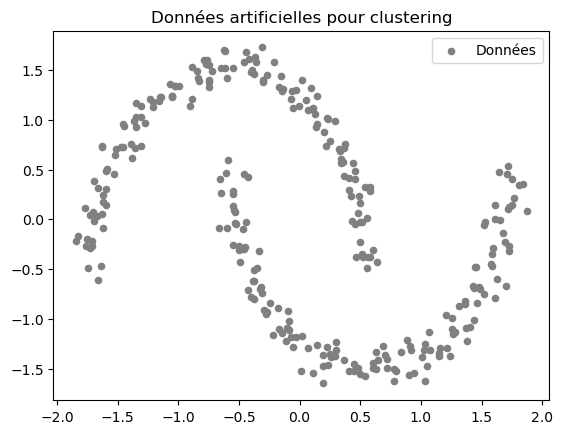

In [16]:
# Génération de données artificielles
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)  # Données en forme de lune
X = StandardScaler().fit_transform(X)  # Normalisation

plt.scatter(X[:, 0], X[:, 1], s=20, c='gray', label="Données")
plt.legend()
plt.title("Données artificielles pour clustering")
plt.show()


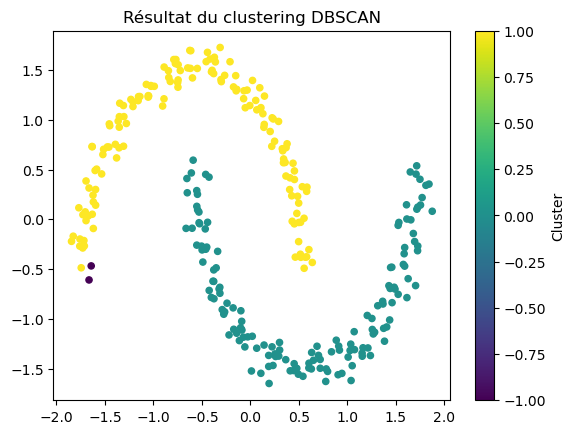

Nombre de clusters trouvés : 2
Nombre de points classés comme bruit : 2


In [17]:
#Application de DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)  # Paramètres clés : eps et min_samples
labels = dbscan.fit_predict(X)

# Affichage des clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=20)
plt.title("Résultat du clustering DBSCAN")
plt.colorbar(label="Cluster")
plt.show()

# Nombre de clusters trouvés (sans compter le bruit -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Nombre de clusters trouvés : {n_clusters}")
print(f"Nombre de points classés comme bruit : {n_noise}")


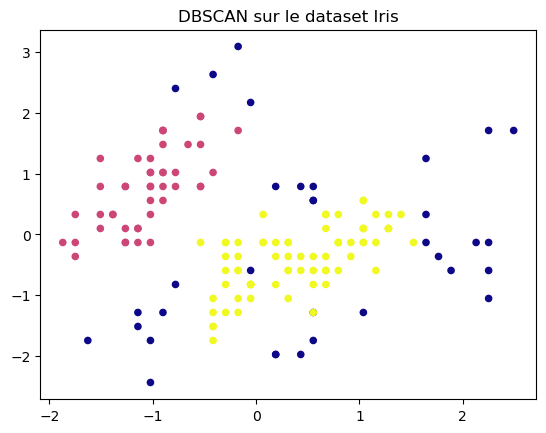

Nombre de clusters trouvés sur Iris : 2


In [18]:
# Test sur un dataset réel (Iris)
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)

dbscan_iris = DBSCAN(eps=0.5, min_samples=5)
iris_labels = dbscan_iris.fit_predict(X_iris)

plt.scatter(X_iris[:, 0], X_iris[:, 1], c=iris_labels, cmap="plasma", s=20)
plt.title("DBSCAN sur le dataset Iris")
plt.show()

print(f"Nombre de clusters trouvés sur Iris : {len(set(iris_labels)) - (1 if -1 in iris_labels else 0)}")





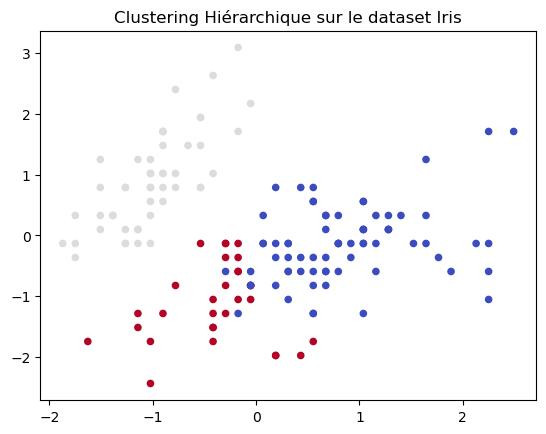

In [19]:
# Application du Clustering Hiérarchique sur Iris
from sklearn.cluster import AgglomerativeClustering

# Création du modèle de clustering hiérarchique
hierarchical = AgglomerativeClustering(n_clusters=3)  # On sait que Iris a 3 classes
hierarchical_labels = hierarchical.fit_predict(X_iris)

# Visualisation
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=hierarchical_labels, cmap="coolwarm", s=20)
plt.title("Clustering Hiérarchique sur le dataset Iris")
plt.show()


In [20]:
# Comparaison des scores silhouette entre DBSCAN et Hiérarchical
from sklearn.metrics import silhouette_score

# Score Silhouette pour DBSCAN (on vérifie qu'il y a plus d'un cluster)
if len(set(iris_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_iris, iris_labels)
else:
    dbscan_silhouette = "Non applicable (1 seul cluster détecté)"

# Score Silhouette pour Hierarchical Clustering
hierarchical_silhouette = silhouette_score(X_iris, hierarchical_labels)

print(f"Silhouette Score DBSCAN : {dbscan_silhouette}")
print(f"Silhouette Score Clustering Hiérarchique : {hierarchical_silhouette}")


Silhouette Score DBSCAN : 0.35651648142700726
Silhouette Score Clustering Hiérarchique : 0.4466890410285909
